In [1]:
import numpy as np
import inspect
import matplotlib.pyplot as plt
import sys
if "/Users/wiktorkubis/Python/Jupyter/Python-MachineLearning/MyLib" not in sys.path:
    sys.path.append("/Users/wiktorkubis/Python/Jupyter/Python-MachineLearning/MyLib")
from meshGrid import mesh_grid_visual

class AdaLineStochastic:
    '''
    Simple perceptron class
    '''
    def __init__(self, n_iter = 100, lr = 0.1):
        '''
        Define constant parameters
        param n_iter: n iterations
        param lr: learning rate
        '''
        self.lr = lr
        self.n_iter = n_iter
        self.mean_cost_per_epoch = []
        self.fit_called = False
        
    def shuffle(self, X, y):
        index = np.random.permutation(len(y))
        return X[index], y[index]
    
    
    def fit(self, X, y):
        '''
        Fitting model.
        param X: feature array
        param y: labels
        '''
        if isinstance(X, (list, tuple)):
            X = np.array(X)    
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.random.randn(X_bias.shape[1])
        self.fit_called = True
        for i in range(self.n_iter):
            X_bias, y = self.shuffle(X_bias, y)
            cost = []
            for xi, yi in zip(X_bias, y):  
                output = self.activation(xi.T.dot(self.w))
                error = (yi - output)
                self.w += self.lr  * xi * error
                cost.append((error**2).sum() / 2.0)
            self.mean_cost_per_epoch.append(np.mean(cost))
                
    
    def decision(self, X):
        '''
        Return decision values
        '''
        assert self.fit_called, 'Call "Fit" before this'
        if isinstance(X, (list, tuple)):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_bias.dot(self.w)
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        '''
        Return 1 or -1 depends on decision value
        1 => decision > 0
        -1 => decision < 0
        '''
        return np.where(self.decision(X) > 0, 1, -1)

In [7]:
adaStochastic = AdaLineStochastic(100, 0.001)

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(cluster_std=1.3)
y = np.where(y == 0, -1, 1)

In [9]:
y

array([ 1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
        1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1])

In [16]:
adaStochastic.fit(X, y)

[-1.42597699 -1.43064224 -1.4353075  ...  1.50175767  1.49709241
  1.49242716]


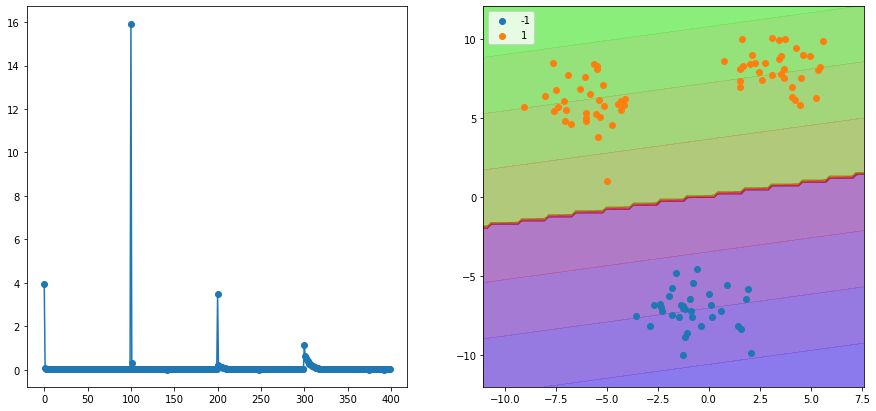

In [17]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
mesh_grid_visual(X, y, adaStochastic)
ax[0].plot(range(len(adaStochastic.mean_cost_per_epoch)), adaStochastic.mean_cost_per_epoch, marker = 'o')
plt.show()